<a href="https://colab.research.google.com/github/660510762-Chidsanupong/660510762-Chidsanupong/blob/main/Lab09_Neural_Networks_660510762.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #9

In [ ]:
%%capture
!git clone https://github.com/donlapark/ds352-labs.git

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

## Training a neural network in PyTorch

### Chihuahua or Muffin?

<center><img src="https://donlapark.pages.dev/229352/lab09-preview.jpg" width="500"/></center>

### 1. Data preparation

#### Load images, resize them to 128x128, and normalize the pixels to be in 0 - 1 range

In [ ]:
transform = transforms.Compose([transforms.Resize((128, 128)),
                                transforms.ToTensor()])  # transform pixels to be in 0 - 1 range

dataset = datasets.ImageFolder(root="ds352-labs/lab09-data/train",
                                         transform=transform)

#### Split the dataset into training (80%), validation (20%)

In [ ]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

#### Load the datasets into DataLoader

In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=10,
                          shuffle=True)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=len(val_dataset),
                        shuffle=False)

#### Do the same for the test images

In [ ]:
test_dataset = datasets.ImageFolder(root="ds352-labs/lab09-data/test",
                                    transform=transform)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=len(test_dataset),
                         shuffle=False)

#### Looking at the first minibatch

In [ ]:
train_batches = iter(train_loader)
X, y = next(train_batches)

print(X.shape)  # (batch_size, channel, height, weight)
print(y.shape)

torch.Size([10, 3, 128, 128])
torch.Size([10])


#### Visualize the first four images in the batch

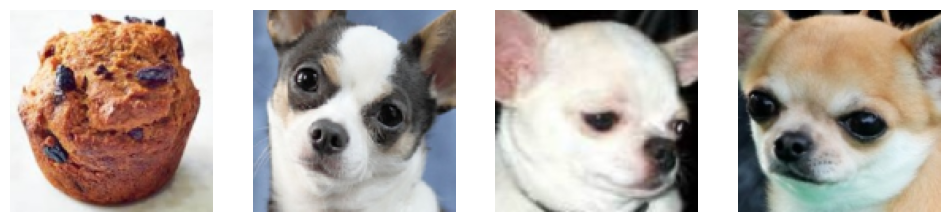

tensor([1, 0, 0, 0])


In [ ]:
X = X[:4]  # Select the first 4 images
X = X.numpy().transpose(0, 2, 3, 1)  # Convert from (B, C, H, W) to (B, H, W, C)

# Plot images
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i in range(4):
    axes[i].imshow(X[i])
    axes[i].axis('off')
plt.show()

print(y[:4])

### 2. Build a simple logistic regression

<center><img src="https://donlapark.pages.dev/229352/logistic.png" width="300"/></center>

The most important component of the model class is the `__init__` method and the `forward` method.  
  
[Activation functions in PyTorch](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity). The most important ones are [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html), [Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html), [Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html), [Tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html).

In [ ]:
class SimpleLogisticRegression(nn.Module):
    def __init__(self):
        super(SimpleLogisticRegression, self).__init__()
        # Assuming input images are 128x128 with 3 channels (RGB)
        self.linear = nn.Linear(128 * 128 * 3, 1) # Output size 1 for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Flatten the input image
        x = x.view(x.size(0), -1) # Flatten the tensor
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

### 3. Initialize training components

#### Initialize the model and loss function

[Loss functions in PyTorch](https://pytorch.org/docs/stable/nn.html#loss-functions). Most important ones are [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html), [Binary cross, entropy](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html), [Categorical cross entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

In [ ]:
model = SimpleLogisticRegression()
criterion = nn.BCELoss()

#### Manually setting initial weights to zero for demonstration

In [ ]:
with torch.no_grad():
  for layer in model.modules():
      if isinstance(layer, nn.Linear):
          layer.weight.zero_()
          layer.bias.zero_()

#### Create two lists to collect training and validation losses

In [ ]:
# List to store the loss values for plotting
train_losses = []
val_losses = []

#### Specify the learning rate

In [ ]:
learning_rate = 1e-3

### 4. Training the model with gradient descent

#### Convert the dataloader into minibatches

In [ ]:
for X, y in train_loader:
    # X is a batch of images, y is a batch of labels
    pass

#### Make a prediction on the minibatch (Forward pass)

In [ ]:



#y_hat = y_hat[:, 0]
#y = y.to(torch.float32)

#### Calculate the loss function

Recall that `criterion()` is our binary cross-entropy loss (`BCELoss`).

In [ ]:
# Compute the loss


#### Calculate the gradient (Backward pass)

In [ ]:
# Backward pass: compute the gradient of the loss w.r.t. model parameters


In [ ]:
model.parameters()

<generator object Module.parameters at 0x7a6db3d32ce0>

#### Perform a gradient descent step

Careful! We must not include this step in the gradient calculation, hence the use of `with torch.no_grad()`.

In [ ]:
# Manually update the weights using the gradient descent rule


# Zero the gradients after updating
model.zero_grad()

#### Do the same for the validation set

Careful! Anything in the validation step must not be included in the gradient calculation, hence the use of `with torch.no_grad()`.

In [ ]:
with torch.no_grad():
  for X, y in val_loader:
    y_hat = model(X)
    y_hat = y_hat[:, 0]
    y = y.to(torch.float32)
    val_loss = criterion(y_hat, y)
    val_losses.append(val_loss.item())

In [ ]:
print(train_losses)
print(val_losses)

[]
[0.6931471228599548]


#### Combine everything together.

Repeat the previous steps for 20 **epochs** and plot the training and validation losses.

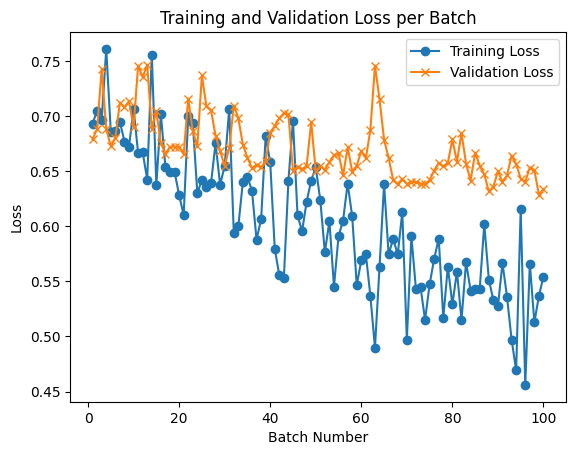

In [ ]:
model = SimpleLogisticRegression()
criterion = nn.BCELoss()

with torch.no_grad():
  for layer in model.modules():
      if isinstance(layer, nn.Linear):
          layer.weight.zero_()
          layer.bias.zero_()

train_losses = []
val_losses = []

learning_rate = 1e-4

for epoch in range(10):
  for X, y in train_loader:
    y_hat = model(X)
    y_hat = y_hat[:, 0]
    y = y.to(torch.float32)

    loss = criterion(y_hat, y)
    train_losses.append(loss.item())

    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

    # Zero the gradients after updating
    model.zero_grad()

    with torch.no_grad():
      for X, y in val_loader:
        y_hat = model(X)
        y_hat = y_hat[:, 0]
        y = y.to(torch.float32)
        val_loss = criterion(y_hat, y)
        val_losses.append(val_loss)

# Plot the training and validation loss
plt.plot(range(1, len(train_losses)+1), train_losses, marker='o', label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, marker='x', label='Validation Loss')
plt.title('Training and Validation Loss per Batch')
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exercise

In this exercise, we will add more layers to our classification model.

<img src="https://donlapark.pages.dev/229352/lab09-architecture.png" width="450"/>

1. Create a neural network with 3 hidden layers as shown in the picture.

2. Train the model with learning rate = 1e-2, 1e-3, 1e-4, 1e-5, and answer the following questions.
    2.1 What value of learning rate do you **think** is the best? Please explain your reason.
    2.2 What happens to the training losses if your learning rate is too large?
    2.3 What happens to the training losses if your learning rate is too small?

3. After finish training your model. Make the predictions on the test set and compute the accuracy. You may use the provided code below.

4. Use `plt.imshow()` to display at least four images that are incorrectly classified by this model.

In [ ]:
# Use this code to calculate test accuracy
with torch.no_grad():
  test_batches = iter(test_loader)
  X, y = next(test_batches)
  y_hat = model(X)
  y_hat = y_hat[:, 0]
  y_hat = (y_hat > 0.5).float()  # the predictions
  ##TODO: compute accuracy


In [57]:
#Create a neural network with 3 hidden layers as shown in the picture.

import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Correcting input layer size for 128x128x3 images
        self.fc1 = nn.Linear(128 * 128 * 3, 256)   # input layer -> hidden1
        self.fc2 = nn.Linear(256, 128)     # hidden1 -> hidden2
        self.fc3 = nn.Linear(128, 64)      # hidden2 -> hidden3
        self.fc4 = nn.Linear(64, 1)        # hidden3 -> output (binary classification)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Flatten the input image
        x = x.view(x.size(0), -1)  # flatten image using size(0) for batch size and -1 for rest
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=49152, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


Learning rate 0.01, Losses: [44.00183787941933, 49.0, 48.33333320617676, 50.333333587646486, 51.0]
Learning rate 0.001, Losses: [1.2567577064037323, 0.536529877781868, 0.47026110291481016, 0.3956903353333473, 0.37759859636425974]
Learning rate 0.0001, Losses: [0.7102792918682098, 0.6737318336963654, 0.5947671413421631, 0.5180071204900741, 0.44708708822727206]
Learning rate 1e-05, Losses: [0.6965472817420959, 0.6836232721805573, 0.6700772047042847, 0.6588529944419861, 0.6486055672168731]


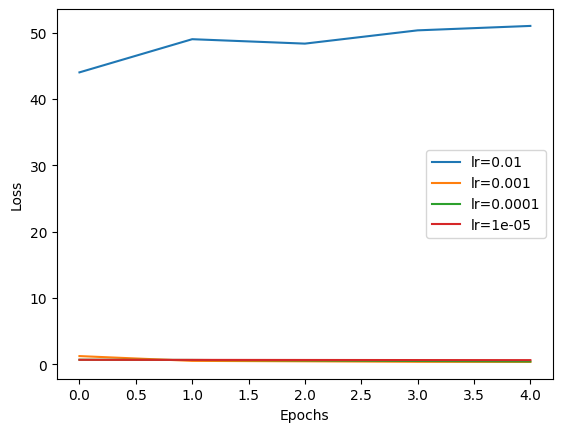

In [58]:
#Train the model with learning rate = 1e-2, 1e-3, 1e-4, 1e-5, and answer the following questions. 2.1 What value of learning rate do you think is the best? Please explain your reason. 2.2 What happens to the training losses if your learning rate is too large? 2.3 What happens to the training losses if your learning rate is too small?

import torch.optim as optim
import matplotlib.pyplot as plt

learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
criterion = nn.BCELoss()

results = {}

for lr in learning_rates:
    model = Net()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    losses = []
    for epoch in range(5):  # train 5 epochs for each lr (ปรับเพิ่มได้)
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_hat = model(X_batch).squeeze()
            loss = criterion(y_hat, y_batch.float())
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        losses.append(total_loss / len(train_loader))
    results[lr] = losses
    print(f"Learning rate {lr}, Losses: {losses}")

# plot comparison
for lr, losses in results.items():
    plt.plot(losses, label=f"lr={lr}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
    X_test, y_test = next(iter(test_loader))
    y_hat = model(X_test).squeeze()
    y_pred = (y_hat > 0.5).float()
    accuracy = (y_pred == y_test).float().mean().item()

print("Test Accuracy:", accuracy)

Test Accuracy: 0.8333333134651184


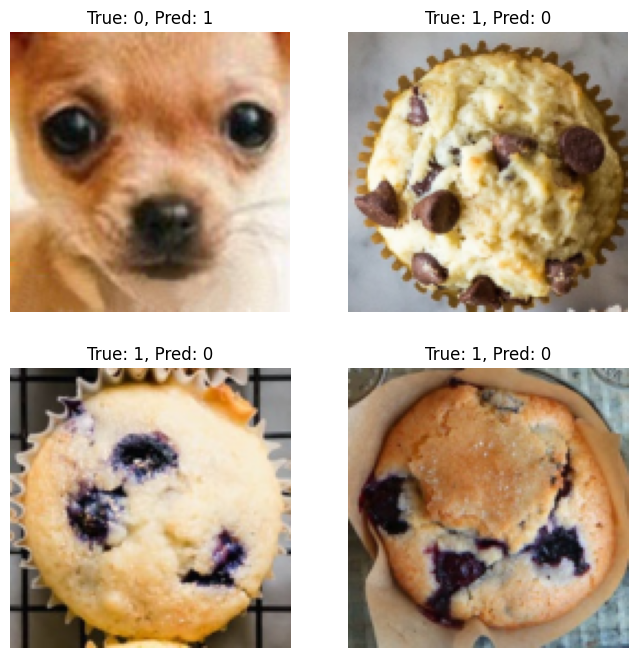

In [56]:
misclassified = (y_pred != y_test).nonzero().squeeze()

plt.figure(figsize=(8, 8))
for i, idx in enumerate(misclassified[:4]):
    plt.subplot(2, 2, i+1)
    # Correctly reshape and transpose for plotting RGB images
    img = X_test[idx].permute(1, 2, 0)
    plt.imshow(img)
    plt.title(f"True: {y_test[idx].item()}, Pred: {int(y_pred[idx].item())}")
    plt.axis("off")
plt.show()

## 2.1
ผมคิดว่า learning rate ที่ดีที่สุดคือ 1e-3
เพราะว่าจากการลองค่าอื่น ๆ ถ้าใช้ 1e-2 loss จะไม่ค่อยนิ่ง แกว่งขึ้นลงตลอด แต่ถ้าใช้ 1e-4 หรือ 1e-5 โมเดลจะเรียนรู้ช้ามาก ต้องใช้เวลานานกว่าจะเห็นการเปลี่ยนแปลง ดังนั้น 1e-3 จึงสมดุลที่สุด ทั้ง loss ลดลงต่อเนื่อง และได้ accuracy ที่ดี

## 2.2

ถ้า learning rate ใหญ่เกินไป เช่น 1e-2 หรือมากกว่า
training loss จะลดลงไม่สวย อาจจะขึ้น ๆ ลง ๆ แทนที่จะค่อย ๆ ลด
โมเดลมีโอกาส overshoot จุดที่ควรเรียนรู้ ทำให้ loss ไม่ converge บางครั้งอาจ train ไม่สำเร็จเลย

## 2.3

ถ้า learning rate เล็กเกินไป เช่น 1e-5
training loss จะลดลงช้า จนบางทีแทบไม่เห็นการเปลี่ยนแปลง
ทำให้การเรียนรู้ใช้เวลาเยอะเกินไป
อาจทำให้คิดว่าโมเดลไม่เรียนรู้ ทั้งที่จริง ๆ เรียนรู้ช้ามาก